In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
import math
from scipy import constants
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (20,6)
import os
import sys
from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad
import shutil
import scienceplots 
plt.style.use(['science', 'notebook', 'grid'])

print (time.ctime())

Tue Jun 13 14:31:34 2023


In [114]:
# def exp(t, a, b, T):
#     return a*(1-b*np.exp(-t**2/T**2))
# def inv_exp(t, a, b, T, t_o):
#     return a*(1-b*np.exp(-(t-t_o)/T))
# def asymptotic(t, a, b, t_o):
#     return a*(1-(b*t_o)/abs(t))
def gausslorentzian(B, A, C, delta, gamma, gamma_EIT, t_0):
    delta_2 = delta - t_0
    D = ((delta_2**2)/gamma)+gamma_EIT
    E = delta_2**2 + D**2
    return B+A*np.exp(-C*((delta_2**2)/E))

def lorentzian(B, A, delta, gamma, gamma_EIT, t_0):
    delta_2 = delta - t_0
    D = ((delta_2**2)/gamma)+gamma_EIT
    E = delta_2**2 + D**2
    return B+A*((delta_2**2)/E)

def gauss(B, A, C, delta, gamma_EIT, t_0):
    delta_2 = delta - t_0
    D = gamma_EIT
    E = delta_2**2 + D**2
    return B+A*np.exp(-C*((delta_2**2)/E))

def gauss2(B, A, delta, gamma_EIT, t_0):
    delta_2 = delta - t_0
    return B+A*np.exp((-(delta_2)**2)/(2*gamma_EIT**2))

def gauss3(t_0, B, A, delta, gamma_EIT):
    delta_2 = delta - t_0
    return B+A*np.exp((-(delta_2)**2)/(2*gamma_EIT**2))

def gauss4(delta, t_0, B, A, gamma_EIT):
    delta_2 = delta - t_0
    return B+A*np.exp((-(delta_2)**2)/(2*gamma_EIT**2))

def gauss5(delta, B, A, gamma_EIT,  t_0):
    delta_2 = delta - t_0
    return B+A*np.exp((-(delta_2)**2)/(2*gamma_EIT**2))

In [128]:
def fit(data, file, npy_dir, func, pwr, fit_init_guess, fit_bounds):
    fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

    best_vals, covar = curve_fit(func, data['Time(s)'], data['CH1(V)'],p0 = fit_init_guess, bounds=fit_bounds)

    print(best_vals,'\n', covar)

    ax.plot(data['Time(s)'], data['CH1(V)'], '-')

#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*e^(-C*(delta^2/(delta^2 + (delta^2/gamma+gamma_EIT)^2)) \n B=%5.4f, A=%5.4f, C=%5.4f, gamma=%5.6f, gamma_EIT=%5.6f, t_0=%5.6f,' % tuple(best_vals))
#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*(delta^2/(delta^2 + (delta^2/gamma+gamma_EIT)^2)) \n B=%5.4f, A=%5.4f, gamma=%5.6f, gamma_EIT=%5.6f, t_0=%5.6f,' % tuple(best_vals))
#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*e^(-C*(delta^2/(delta^2 + gamma_EIT)^2)) \n B=%5.4f, A=%5.4f, C=%5.4f, gamma_EIT=%5.6f, t_0=%5.6f,' % tuple(best_vals))
    ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*e^((-(delta_2)^2)/(2*gamma_EIT^2)) \n B=%5.4f, A=%5.4f, gamma_EIT=%5.6f,\n t_0=%5.6f' % tuple(best_vals))

    ax.set_title(f'EIT Single Rail, Control {pwr} mW, Probe 46 uW, Rb @ 55 C') 
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Volts (V)', fontsize=12)
    plt.legend(loc='upper right')
    plt.savefig(file[:-4]+'_fit.png')

    np.save(npy_dir+"/"+file.rsplit("/",1)[-1][:-4]+'_'+str(pwr)+'mW_55C_best_vals.npy', best_vals)
    np.save(npy_dir+"/"+file.rsplit("/",1)[-1][:-4]+'_'+str(pwr)+'mW_55C_covar.npy', covar)
    return None

In [123]:
root = "/mnt/e/Google_Drive_Backup_E/Data/EIT_data_6_7_2023/"

In [124]:
# make new folder if not exists
npydir = (root+"npy_files")
if not os.path.exists(npydir):
    os.mkdir(npydir)

In [12]:
nums = [25, 27, 28, 30, 31]
# 31 dbm: 2.8 mW, 30 dbm: 2.1mW, 28 dbm: 1.1mW, 27 dbm: 792 uW, 25 dbm: 355 uW
pwrs = [0.355, 0.792, 1.1, 2.1, 2.8]
i = 0 
for num in nums:
    file = (root+f"{str(num)}.csv")
    print(file)

    data = pd.read_csv(file)

    print(time.ctime())

    print(data)
#     (B, A, C, delta, gamma, gamma_EIT)
    fitInitGuess = [0.06, 0.8, 10*10**(-5), 1*10**(-4)]
    fitBounds=((0,0.5,0,0*10**-4),(5.0, 0.9, 0.001, 1*10**(-3)))
    fit(data, file, npydir, lorentzian, pwrs[i], fitInitGuess, fitBounds)
    i = i+1

/mnt/e/Google_Drive_Backup_E/Data/EIT_data_6_7_2023/31.csv
Fri Jun  9 10:31:27 2023
         Time(s)   CH1(V)    CH2(V)
0      -0.011800  1.10783 -0.059951
1      -0.011799  1.10783 -0.059951
2      -0.011799  1.10783 -0.059951
3      -0.011798  1.10783 -0.059951
4      -0.011798  1.10783 -0.059951
...          ...      ...       ...
999995  0.488200  1.10783 -0.059951
999996  0.488200  1.10783 -0.059951
999997  0.488200  1.10783 -0.059951
999998  0.488200  1.10783 -0.059951
999999  0.488200  1.10783 -0.059951

[1000000 rows x 3 columns]


In [119]:
nums = [25, 27, 28, 30, 31]
num = 31
file1 = (root+f"{str(num)}.csv")
print(file1)

data1 = pd.read_csv(file1)

print(time.ctime())

/mnt/e/Google_Drive_Backup_E/Data/EIT_data_6_7_2023/31.csv
Fri Jun 16 14:45:55 2023


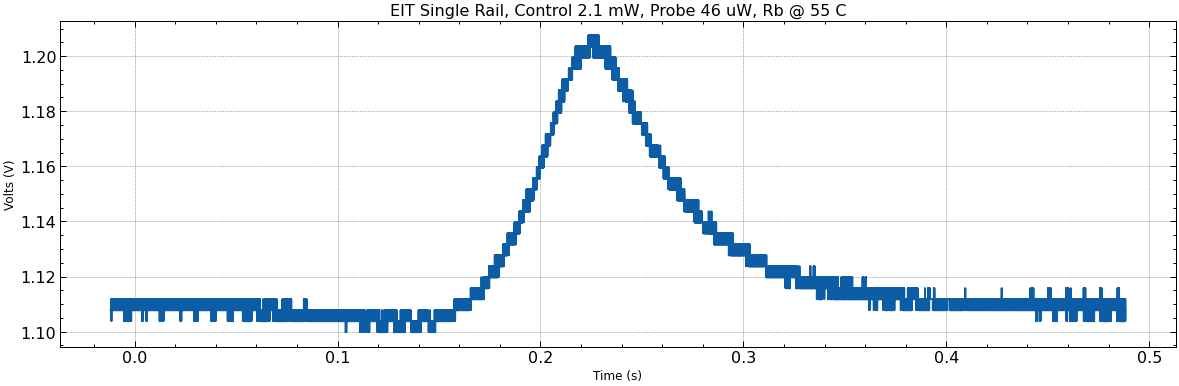

In [120]:
fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

ax.plot(data1['Time(s)'], data1['CH1(V)'], '-')
# tick_spacing = 0.0005
# import matplotlib.ticker as ticker
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax.set_xlim(1.1*(10**(-6)), (2*(10**(-6))))
# ax.set_xlim(0,1.3*(10**(-6)))
#ax.set_ylim(40000,60000)
ax.set_title('EIT Single Rail, Control 2.1 mW, Probe 46 uW, Rb @ 55 C') 
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Volts (V)', fontsize=12)
ax.grid(True)
# ax.set_xlim(0-(5000*(10**(-6))), (0*(10**(-6))))

# plt.savefig()

In [121]:
# gausslorentzian(B, A, C, gamma, gamma_EIT, t_0)
# 4MHz = 1s
# fitInitGuess = [1.11, 0.1, 4, (500)/(4), 0.25, 0.23]
# fitBounds=((1.1, 0.09, -np.inf, (300)/(4), 0, 0.2),(1.12, 0.25, np.inf, (700)/(4), 5/4, 0.25))
# lorentzian(B, A, gamma, gamma_EIT, t_0)
# fitInitGuess = [1.11, 0.1, (500*10**6)/(4*10**6), 0.25, 0.23]
# fitBounds=((1, 0.09, (300*10**6)/(4*10**6), 0, 0.2),(1.12, 0.25, (700*10**6)/(4*10**6), 5/4, 0.25))
# gauss(B, A, C, gamma_EIT, t_0)
# 4MHz = 1s
# fitInitGuess = [1.11, 0.1, 4, 0.25, 0.23]
# fitBounds=((1.1, 0.09, 0, 0, 0.2),(1.12, 0.25, 10, 5/4, 0.25))
# gauss2(B, A, gamma_EIT, t_0)
# 4MHz = 1s
# fitInitGuess = [1.11, 0.1, 0.25, 0.23]
# fitBounds=((1.1, 0.09, 0, 0.2),(1.12, 0.25, 1.25, 0.25))

fitInitGuess = [1.2, 1.9, 0.25, 0.25]
fitBounds=((1.1, 0, 0, 0),(1.3, 2.5, 0.5, 0.5))
# fit2(df, gauss5, fitInitGuess, fitBounds)

[1.10979305 0.08835442 0.03051197 0.23179033] 
 [[ 4.35825040e-11 -3.08174717e-11 -2.12847951e-11  3.25452154e-18]
 [-3.08174717e-11  4.30075073e-10 -7.89461280e-11  4.28973967e-17]
 [-2.12847951e-11 -7.89461280e-11  7.53160114e-11 -1.68958521e-17]
 [ 3.25452154e-18  4.28973967e-17 -1.68958521e-17  6.49209585e-11]]


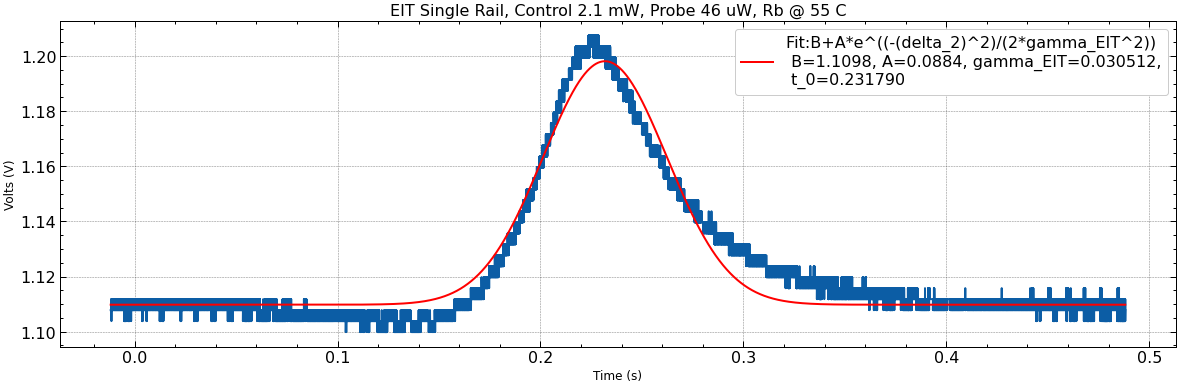

In [129]:
fit(data1, file1, npydir, gauss5, 2.1, fitInitGuess, fitBounds)

In [90]:
x_array = np.linspace(0,0.5,100)

# amp1 = 100
# sigma1 = 1
# cen1 = 0.25
# y_array_gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))
mu = 0.25  # Mean
sigma = 0.1  # Standard deviation
y_array_gauss = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_array - mu) / sigma) ** 2)

# creating some noise to add the the y-axis data
y_noise_gauss = (np.exp((np.random.ranf(50))))/5
# y_array_gauss += y_noise_gauss

Text(0, 0.5, 'y_array')

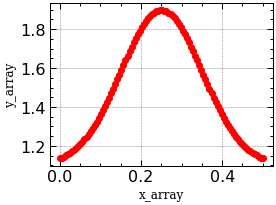

In [91]:
fig = plt.figure(figsize=(4,3))
# gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot()

y_array_gauss = y_array_gauss * (1.3 - 1.1) + 1.1

ax1.plot(x_array, y_array_gauss, "ro")

# ax1.set_xlim(-5,105)
# ax1.set_ylim(-0.5,5)
# ax1.set_xlim(0,0.5)
# ax1.set_ylim(1.1,1.3)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)


In [105]:
def fit2(data, func, fit_init_guess, fit_bounds):
    fig, ax = plt.subplots(figsize = (20,6), facecolor='w')

    best_vals, covar = curve_fit(func, data['Time(s)'], data['CH1(V)'],p0 = fit_init_guess, bounds=fit_bounds)

    print(best_vals,'\n', covar)

    ax.plot(data['Time(s)'], data['CH1(V)'], '-')

#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*e^(-C*(delta^2/(delta^2 + (delta^2/gamma+gamma_EIT)^2)) \n B=%5.4f, A=%5.4f, C=%5.4f, gamma=%5.6f, gamma_EIT=%5.6f, t_0=%5.6f,' % tuple(best_vals))
#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*(delta^2/(delta^2 + (delta^2/gamma+gamma_EIT)^2)) \n B=%5.4f, A=%5.4f, gamma=%5.6f, gamma_EIT=%5.6f, t_0=%5.6f,' % tuple(best_vals))
#     ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*e^(-C*(delta^2/(delta^2 + gamma_EIT)^2)) \n B=%5.4f, A=%5.4f, C=%5.4f, gamma_EIT=%5.6f, t_0=%5.6f,' % tuple(best_vals))
    ax.plot(data['Time(s)'], func(data['Time(s)'], *best_vals),'r-',label='Fit:B+A*e^((-(delta_2)^2)/(2*gamma^2)) \n B=%5.4f, A=%5.4f, gamma=%5.6f, t_0=%5.6f,' % tuple(best_vals))

#     ax.set_title(f'EIT Single Rail, Control {pwr} mW, Probe 46 uW, Rb @ 55 C') 
#     ax.set_xlabel('Time (s)', fontsize=12)
#     ax.set_ylabel('Volts (V)', fontsize=12)
    plt.legend(loc='lower right')
#     plt.savefi%%filele[:-4]+'_fit.png')

#     np.save(npy_dir+"/"+file.rsplit("/",1)[-1][:-4]+'_'+str(pwr)+'mW_55C_best_vals.npy', best_vals)
#     np.save(npy_dir+"/"+file.rsplit("/",1)[-1][:-4]+'_'+str(pwr)+'mW_55C_covar.npy', covar)
    return None

In [92]:
df = pd.DataFrame({'Time(s)': x_array, 'CH1(V)': y_array_gauss})
df.head()

,Time(s),CH1(V)
0,0.000000,1.135057
1,0.005051,1.139724
2,0.010101,1.144898
3,0.015152,1.150616
4,0.020202,1.156918


[1.10000942 0.79787706 0.09999857 0.25      ] 
 [[ 9.23857681e-13 -7.35456886e-13 -1.40156040e-13  1.51514177e-23]
 [-7.35456886e-13  8.46501174e-13  8.93041767e-14  3.23078204e-21]
 [-1.40156040e-13  8.93041767e-14  2.68720866e-14 -4.09143009e-22]
 [ 1.51514177e-23  3.23078204e-21 -4.09143009e-22  5.44898005e-15]]


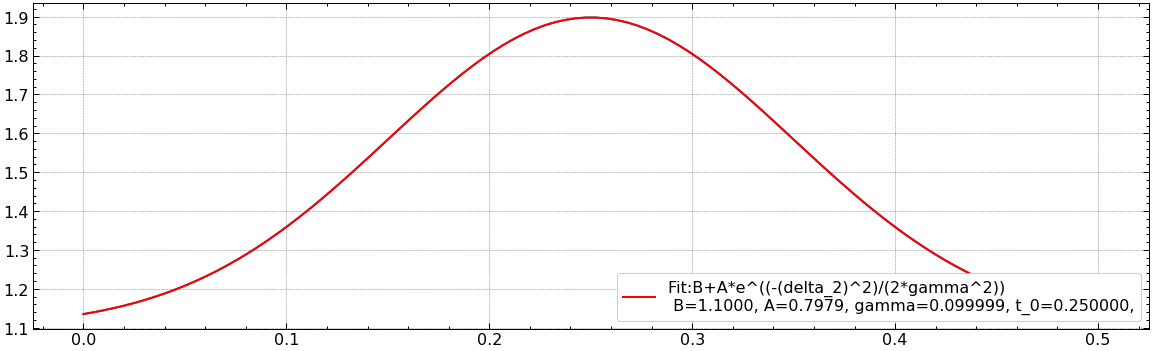

In [116]:
# gauss2(B, A, gamma_EIT, t_0)
# fitInitGuess = [1.11, 0.1, 20, 0.23]
# fitBounds=((0, 0.09, 40, 0.2),(6, 0.25, 60, 0.25))
# fitInitGuess = [1.2, 1.9, 0.25, 0.25]
# fitBounds=((1.1, 0, 0, 0),(1.3, 2.5, 0.5, 0.5))
# fit2(df, gauss2, fitInitGuess, fitBounds)
# gauss2(t_0, B, A, gamma)
# fitInitGuess = [0.25, 1.2, 1.9, 0.25]
# fitBounds=((0, 1.1, 0, 0),(0.5, 1.3, 2.5, 0.5))
# fit2(df, gauss3, fitInitGuess, fitBounds)
# gauss4(delta, t_0, B, A, gamma_EIT)
# fitInitGuess = [0.25, 1.2, 1.9, 0.25]
# fitBounds=((0, 1.1, 0, 0),(0.5, 1.3, 2.5, 0.5))
# fit2(df, gauss4, fitInitGuess, fitBounds)
# gauss5(delta, B, A, gamma_EIT,  t_0)
fitInitGuess = [1.2, 1.9, 0.25, 0.25]
fitBounds=((1.1, 0, 0, 0),(1.3, 2.5, 0.5, 0.5))
fit2(df, gauss5, fitInitGuess, fitBounds)